# Worth of a Goal
## Upgrading the golden boot to platinum boot!
Analyst/Author: Christian Kotitschke

### Hypothesis
*Strikers who score the key goals, the ones that can be directly translated into more wins and more points, are worth rather more than the flat-track bullies who appear to rub salt into wounds, scoring the third and fourth goals as victory turns into a drubbing. Simply counting strikes can be deceiving: one goal is not the same as another.*

from The Numbers Game - Why everything you know about soccer is wrong!

### The Bullies

All of them are prolific strikers in their own right. World class. But when it rains, it pours, and these guys tend to pile on and score more and more goals.

### The worthy!

Maybe not as flashy or not that often talked about, these strikers quietly score the important goals more than others, sometimes on the lower level teams that need it the most. They are true value for their money.

### Approach
Fill in content

### Some Setup code


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Grabbing the right set of data
Comment in or out the sets of data you want to run teh analysis over:
- Premier League 2018-2019 data
- Bundesliga 2018-2019 data
- MLS 2019 data

*Note: All data is has been curated from https://footystats.org/api/ through a valid subscription.*

In [116]:
# player_goals = pd.read_csv('Data/PlayerGoals_PL2018_19.csv')
# player_goals = pd.read_csv('Data/PlayerGoals_BL2018_19.csv')
# player_goals = pd.read_csv('Data/PlayerGoals_MLS2019.csv')

# player_goals = pd.read_csv('Data/PlayerGoals_Ecuador_SerieA.csv')
player_goals = pd.read_csv('Data/PlayerGoals_Uruguay_Primera19.csv')

### Further massaging the data
- Definining goal value calculation function
- Defining value coloring function
- Defining some table property styles
- Adding goal value column
- Adding column for simple goal value (1 per goal)



In [117]:
from operator import truediv

def calculate_goal_value(go_ahead_goal, game_winning_goal, tying_goal, game_tying_goal, only_goal, only_goal_team, away_goal, previous_score_home, previous_score_away):
  value = 1
  if game_winning_goal:
    value = value *2
  if game_tying_goal:
    value = value *1.5    
  if go_ahead_goal:
    value = value + 0.2
  if tying_goal:
    value = value + 0.1
  if only_goal:
    value = value + 0.5
  if only_goal_team:
    value = value + 0.3
  if away_goal:
    value = value + 0.2
  if ((previous_score_home > previous_score_away) and away_goal == False):
    value = truediv(value,(previous_score_home - previous_score_away) + 1)
  if ((previous_score_home < previous_score_away) and away_goal == True):
    value = truediv(value, (previous_score_away - previous_score_home) + 1)
  return value

def color_lt0_red_gt0_green(value):
  if value > 0:
    color = 'green'
  elif value < 0:
    color = 'red'
  else:
    color = 'black'

  return 'color: %s' % color

# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '10px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '10px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# Set colormap equal to seaborns light green color palette
cm_green = sns.light_palette("green", as_cmap=True)

# Set colormap equal to seaborns light green color palette
cm_red = sns.light_palette("red", as_cmap=True)

In [118]:
player_goals['goal_value'] = player_goals[['go_ahead_goal', 'game_winning_goal', 'tying_goal', 'game_tying_goal', 'only_goal', 'only_goal_team', 'away_goal', 'previous_score_home', 'previous_score_away']].apply(lambda x: calculate_goal_value(x['go_ahead_goal'], x['game_winning_goal'], x['tying_goal'], x['game_tying_goal'], x['only_goal'], x['only_goal_team'], x['away_goal'], x['previous_score_home'], x['previous_score_away']),axis=1)
player_goals['simple_goal_value'] = 1
player_goals_outcomes = player_goals.groupby(['player_id', 'player_name', 'team_name','team_final_table_position'], as_index=False).agg({'goal_value':'sum','simple_goal_value':'sum'})
player_goals_outcomes_present_full = player_goals_outcomes[['player_name', 'team_name', 'team_final_table_position', 'simple_goal_value', 'goal_value']]
player_goals_outcomes_present = player_goals_outcomes[['player_name', 'team_name', 'simple_goal_value', 'goal_value']]
player_goals_outcomes_present['gain'] = player_goals_outcomes_present['goal_value']-player_goals_outcomes['simple_goal_value']

C:\Users\novgr\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
player_goals_outcomes_present

,player_name,team_name,simple_goal_value,goal_value,gain
0,Raúl Octavio Rivero Falero,Club Nacional de Football,5,5.600000,0.600000
1,Álvaro Fernández Gay,Club Plaza Colonia de Deportes,1,3.000000,2.000000
2,Álvaro Fernández Gay,Rampla Juniors Fútbol Club,1,2.200000,1.200000
3,Leandro Joaquín Rodríguez Telechea,Racing Club de Montevideo,1,1.700000,0.700000
4,Francisco Jiménez Tejada,CA Peñarol,5,6.000000,1.000000
...,...,...,...,...,...
249,Carlos Javier Grossmüller,Danubio Fútbol Club,8,8.700000,0.700000
250,Facundo Rodríguez Calleriza,CA Boston River,6,6.900000,0.900000
251,Thiago Vecino Berriel,Club Nacional de Football,3,2.733333,-0.266667
252,Cristian Barros Mirabal,Defensor Sporting Club,1,0.333333,-0.666667


### Displaying the Top 10 Scorer data 
This includes their goal values data as well as gains and gains per goal

In [120]:
player_goals_outcomes_present_clean = player_goals_outcomes_present.rename(columns = {'player_name' : 'Name', 'team_name' : 'Team', 'team_final_table_position' : 'Final Table Position', 'simple_goal_value' : 'Goals', 'goal_value':'Goal Value', 'gain':'Total gain'}) 

sorted_by_simple = player_goals_outcomes_present_clean.sort_values(by=['Goals'], ascending=False)


sorted_by_simple.head(10).style.applymap(color_lt0_red_gt0_green, subset=['Total gain']).set_table_styles(styles).hide_index()

Name,Team,Goals,Goal Value,Total gain
Juan Ignacio Ramírez Polero,Liverpool FC Montevideo,23,20.9667,-2.03333
Gonzalo Rubén Bergessio,Club Nacional de Football,20,22.0833,2.08333
Joaquín Zeballos Machado,CA Juventud,19,20.3667,1.36667
Cecilio Alfonso Waterman Ruiz,Club Plaza Colonia de Deportes,17,27.6333,10.6333
Nicolás Sosa Sánchez,Racing Club de Montevideo,16,19.4333,3.43333
Maximiliano Daniel Pérez Tambasco,Centro Atlético Fénix,14,18.0333,4.03333
Jonathan David Dos Santos Duré,Cerro Largo Fútbol Club,13,15.5333,2.53333
Federico Andrés Martínez Berroa,Liverpool FC Montevideo,12,12.3,0.3
Leonardo Cecilio Fernández López,Centro Atlético Fénix,12,13.9,1.9
Sebastián Sosa Sánchez,Cerro Largo Fútbol Club,11,15.5,4.5


### Displaying gains focussed charts
- Gains Top 10
- Gains per goal (for any player with at least 10 scored goals) Top 10

In [121]:
player_goals_outcomes_present_clean['Gain per goal'] = player_goals_outcomes_present_clean['Total gain']/player_goals_outcomes_present_clean['Goals']
sorted_by_gain = player_goals_outcomes_present_clean.sort_values(by=['Total gain'], ascending=False)
sorted_by_gain_per_goal = player_goals_outcomes_present_clean.sort_values(by=['Gain per goal'], ascending=False)

In [122]:
sorted_by_gain.head(10).style.set_table_styles(styles).background_gradient(cmap=cm_green, subset=['Total gain']).hide_index()

Name,Team,Goals,Goal Value,Total gain,Gain per goal
Cecilio Alfonso Waterman Ruiz,Club Plaza Colonia de Deportes,17,27.6333,10.6333,0.62549
Maureen Javier Franco Alonso,Club Atlético Cerro,5,11.1,6.1,1.22
Douglas Matías Arezo Martínez,Club Atlético River Plate,6,12.0333,6.03333,1.00556
Juan Manuel Olivera López,Club Atlético River Plate,6,12,6,1
Cristian Gabriel Rodríguez Barrotti,CA Peñarol,5,10.9,5.9,1.18
Santiago Martín Paiva Mattos,Danubio Fútbol Club,9,14.3,5.3,0.588889
Sebastián Sosa Sánchez,Cerro Largo Fútbol Club,11,15.5,4.5,0.409091
Christian Daniel Bravo Araneda,Montevideo Wanderers Fútbol Club,6,10.3,4.3,0.716667
Juan Ángel Albín Leites,Rampla Juniors Fútbol Club,7,11.3,4.3,0.614286
Franco Acosta Machado,Club Plaza Colonia de Deportes,2,6.2,4.2,2.1


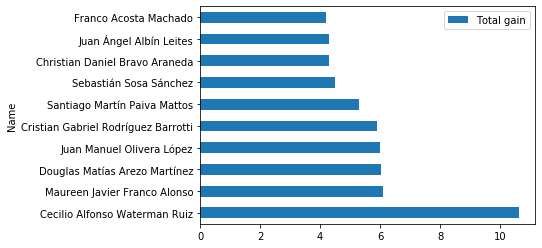

In [123]:
gain_top10 = sorted_by_gain.head(10)
ax = plt.gca()
gain_top10.plot(kind='barh', x='Name', y='Total gain' ,ax=ax)

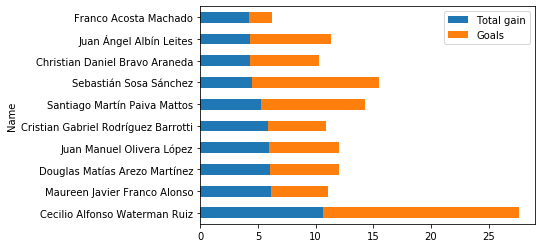

In [124]:
ax = plt.gca()
gain_top10.plot(kind='barh',x='Name',y=['Total gain', 'Goals' ] ,ax=ax, stacked=True)

In [127]:
gain_per_goal_top10 = sorted_by_gain_per_goal.query('Goals>10').head(10)
gain_per_goal_top10.style.set_table_styles(styles).background_gradient(cmap=cm_green, subset=['Gain per goal']).hide_index()

Name,Team,Goals,Goal Value,Total gain,Gain per goal
Cecilio Alfonso Waterman Ruiz,Club Plaza Colonia de Deportes,17,27.6333,10.6333,0.62549
Sebastián Sosa Sánchez,Cerro Largo Fútbol Club,11,15.5,4.5,0.409091
Maximiliano Daniel Pérez Tambasco,Centro Atlético Fénix,14,18.0333,4.03333,0.288095
Nicolás Sosa Sánchez,Racing Club de Montevideo,16,19.4333,3.43333,0.214583
Jonathan David Dos Santos Duré,Cerro Largo Fútbol Club,13,15.5333,2.53333,0.194872
Leonardo Cecilio Fernández López,Centro Atlético Fénix,12,13.9,1.9,0.158333
Gonzalo Rubén Bergessio,Club Nacional de Football,20,22.0833,2.08333,0.104167
Joaquín Zeballos Machado,CA Juventud,19,20.3667,1.36667,0.0719298
Federico Andrés Martínez Berroa,Liverpool FC Montevideo,12,12.3,0.3,0.025


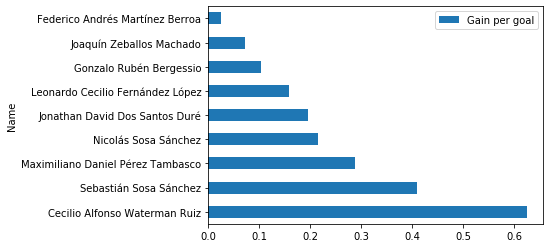

In [128]:
ax = plt.gca()
gain_per_goal_top10.plot(kind='barh',x='Name',y='Gain per goal' ,ax=ax, stacked=True)